# Data

X_train: 60000 * (28*28)

Y_train: 60000 * 10

X_test: 10000 * (28*28)

Y_test: 10000 * 10

# 4. Deep Learning

## Question 3:



### (a)

In [ ]:
class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        

    def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)          
        return x

torch.manual_seed(42)    # reproducible, the first one

# instantiate a network
net = OurNet(n_feature = input_size, n_hidden = hidden_size, n_output = num_classes) 

# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

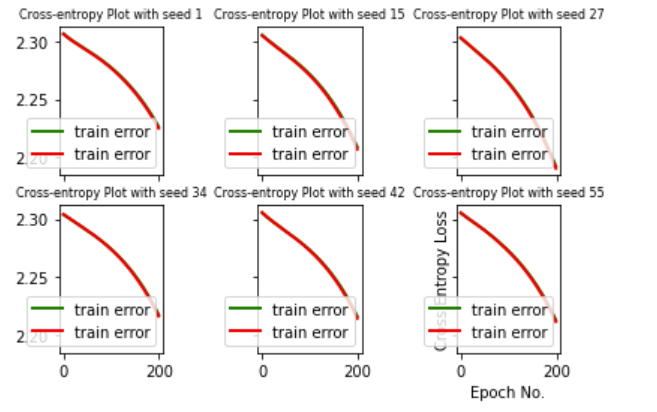

It looks like the 2 curves are very close to each other, and the decreasing rate of cross-entropy loss goes up as the number of epoches increases. 

(b)

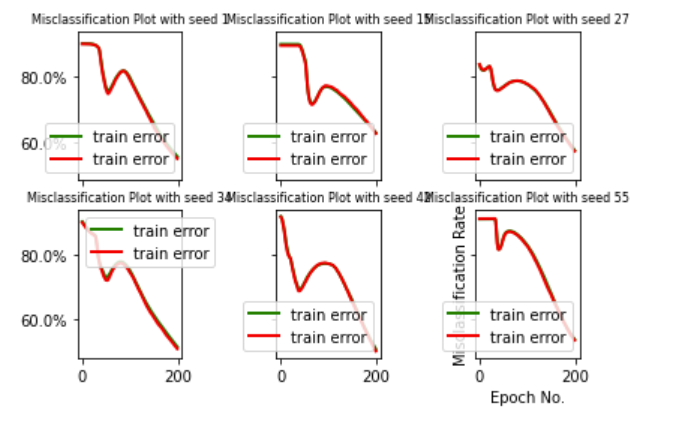

For misclassification rate, the measurement on both train and test sets are very close. 

As compared to the cross-entropy plot, we found that misclassification rate decreases with some fluctuations.

(c)

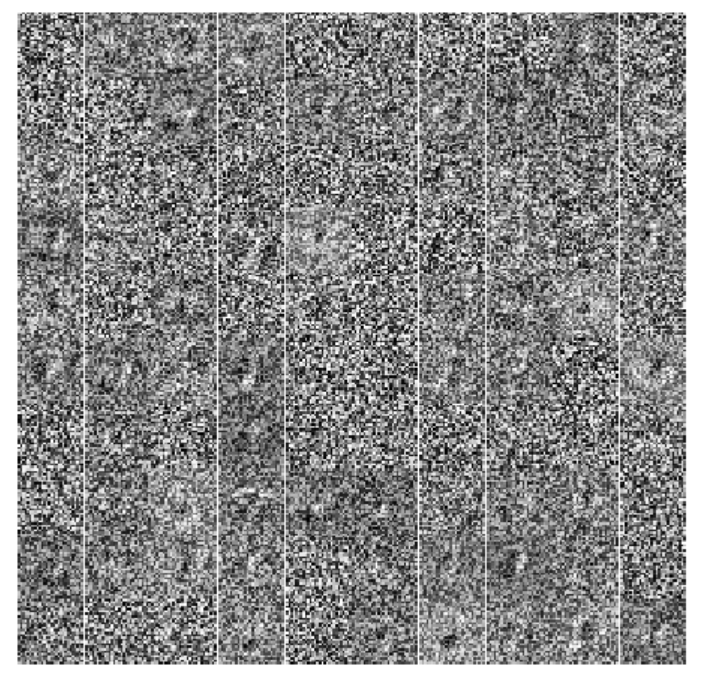

To be honest, it is really hard to tell the structure by looking at the plots. 

(d)

**Experiment On Learning Rate:**

We can see that if we use large learning rate, misclassification rate coverges very quickly (less epoches to be stable) with other hyperparameters stay the same. However, the stabilized opint is just a suboptimum. We can still improve the result if we use a smaller learning rate.

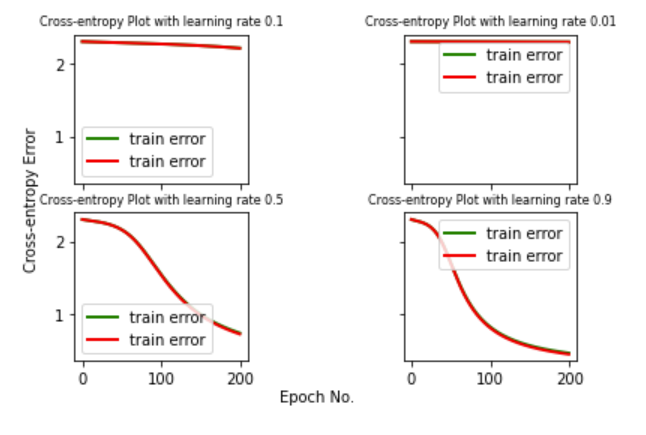

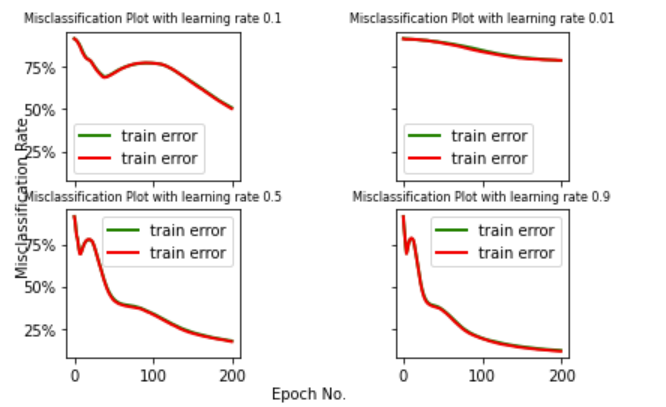

**Experiment On Momentum:**

It turns out that with larger momentum, the convergence rate become very large (quick convergence). At the same time, it dampens the oscillation of measurement.

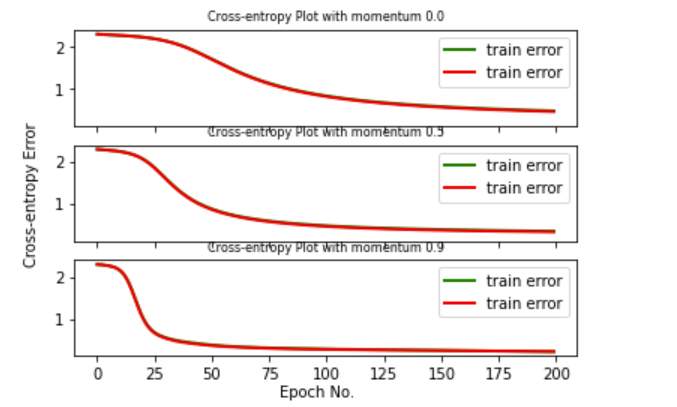

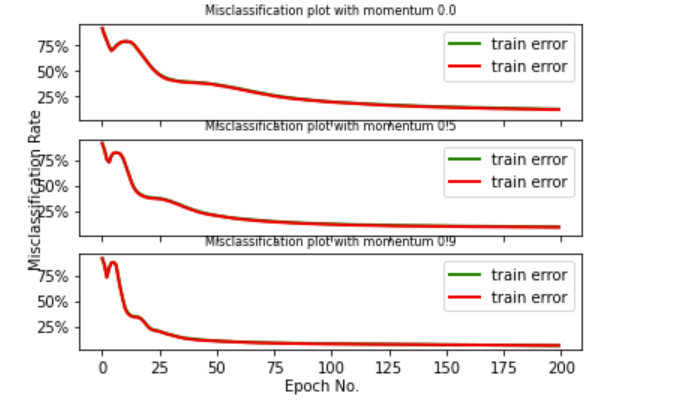

## Question 4: 

(a)

In [ ]:
class OurCNN(torch.nn.Module):     
    def __init__(self, n_hidden, n_output):
        super(OurCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5) # one grey scale channel, output channel size, kernel size
        self.pool = nn.MaxPool2d(2)
        # self.conv2 = nn.Conv2d(16, 33, 5)
        self.fc1 = torch.nn.Linear(16*12*12 , hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # nonlinear activation
        x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*12*12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

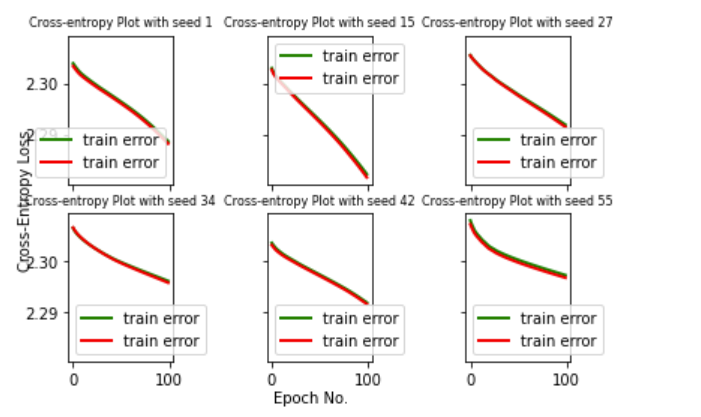

It looks like the decreasing rate of cross-entropy slows down as epoches increases for CNN.

(b)

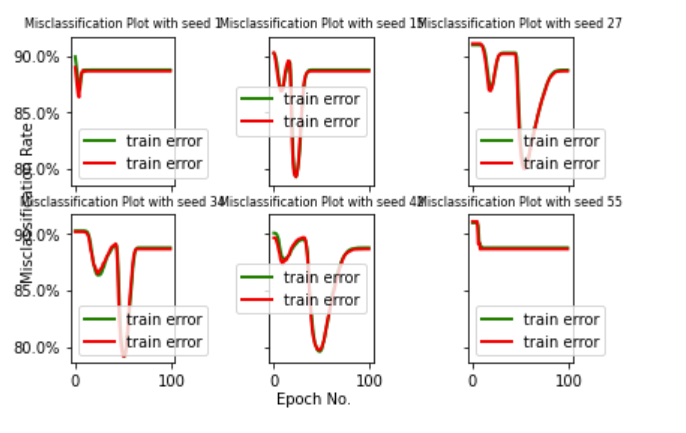

For misclassification rate, the curve produced by single layer CNN doesn't seem to be better than ANN. But the curve converges relatively faster.

(c)

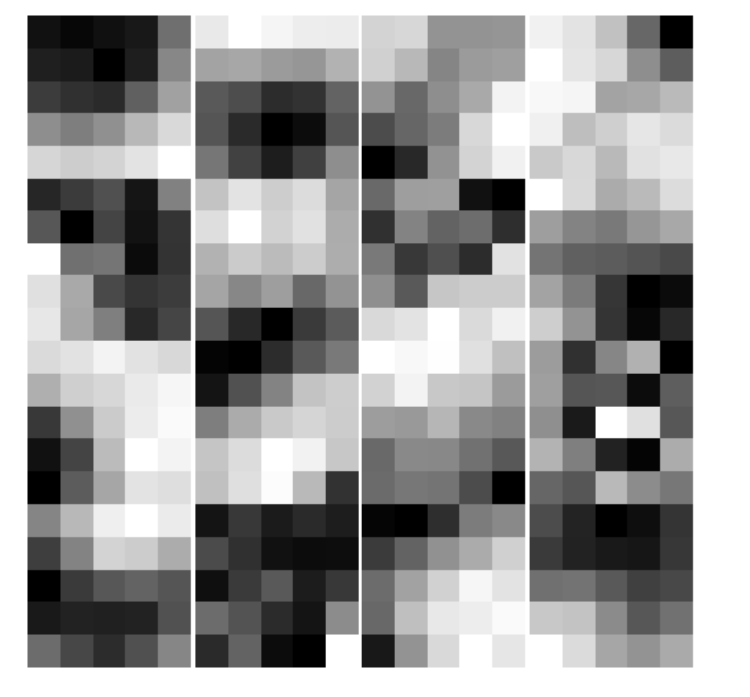

Can't really tell the structure it learned...

(d)

**Experiment On Learning Rate**

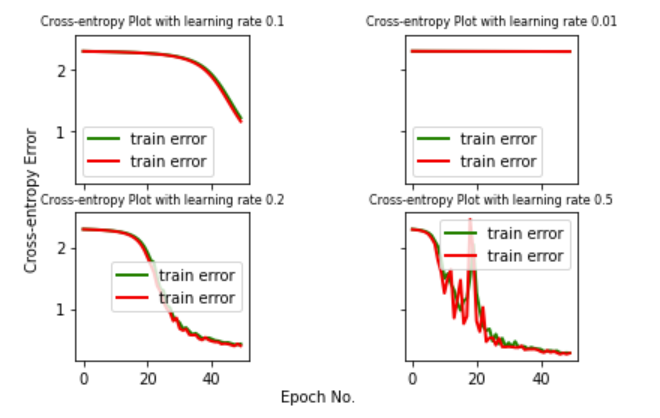

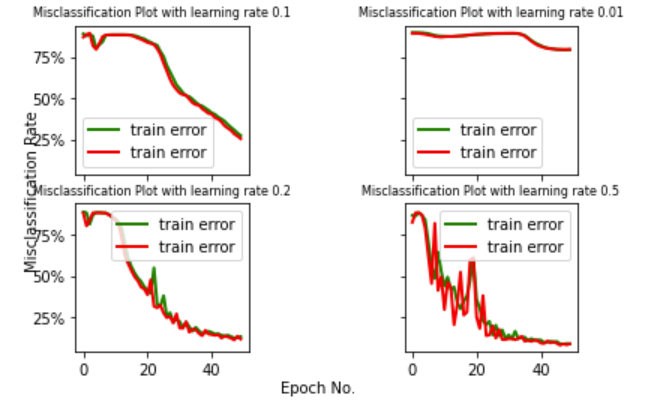

The observation is simliar to Q3, where larger learning rate gives us quicker convergence. However, CNN tends to give us a better result than ANN.

**Experiment ON Momentum**

The observation is similiar to Q3, where momentum tends to smoothen the curves and give us faster convergence.

# Question 5

In [ ]:
class OurCNN(torch.nn.Module):     
    def __init__(self, n_hidden, n_output):
        super(OurCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5) # one grey scale channel, output channel size, kernel size
        self.conv1_bn = nn.BatchNorm2d(16)

        self.pool = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(16, 33, 5)
        self.conv2_bn=nn.BatchNorm2d(33)

        self.dropout1=nn.Dropout(0.25)

        self.fc1 = torch.nn.Linear(33*4*4 , hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # nonlinear activation
        x = self.conv1(x)
        x = self.pool(F.relu(self.conv1_bn(x)))
        x = self.conv2(x)
        x = self.pool(F.relu(self.conv2_bn(x)))
        x = self.dropout1(x)
        x = x.view(-1, 33*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

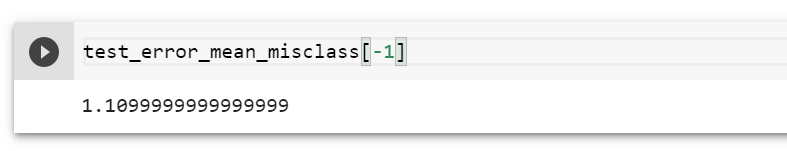

After going through the tunning process (like what we did in Q3), we can see that the model's best mean misclassificaton rate on the test set is less then $1.4\%$.

# Question 6

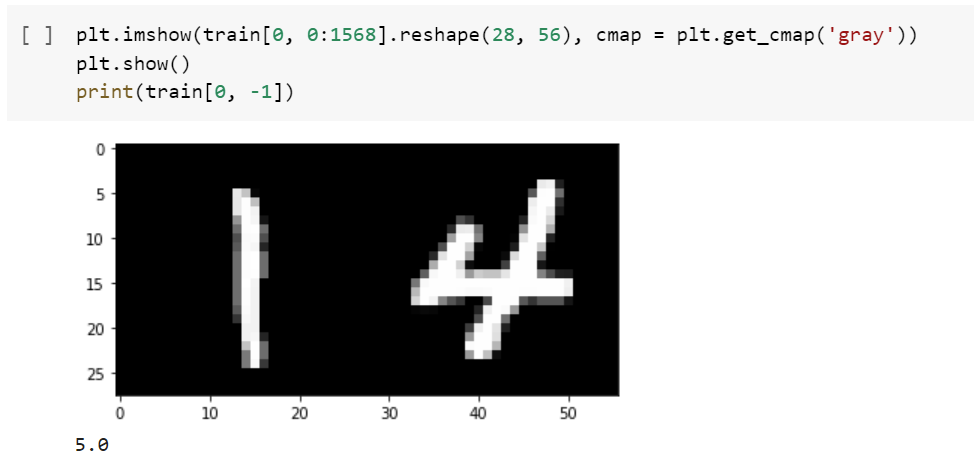

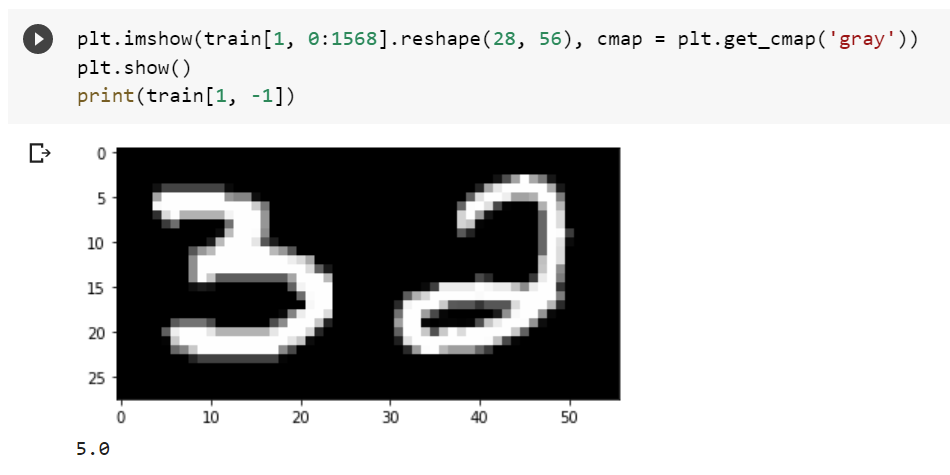

**It turns out that the sum of 2 digits is euqal to the last coordinate of each row.**

# Question 7

In [ ]:
class OurCNN(torch.nn.Module):     
    def __init__(self, n_hidden, n_output):
        super(OurCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5) # one grey scale channel, output channel size, kernel size
        self.conv1_bn = nn.BatchNorm2d(16)

        self.pool = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(16, 33, 5)
        self.conv2_bn=nn.BatchNorm2d(33)

        self.dropout1=nn.Dropout(0.25)

        self.fc1 = torch.nn.Linear(33*4*11 , hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # nonlinear activation
        x = self.conv1(x)
        x = self.pool(F.relu(self.conv1_bn(x)))
        x = self.conv2(x)
        x = self.pool(F.relu(self.conv2_bn(x)))
        x = self.dropout1(x)
        x = x.view(-1, 33*4*11)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

I throw the 2 digits into my CNN model to train at the same time. Magically, it have around $8\%$ misclassification rate on validation set. After I did all steps mentioned in Q3 to tune the model, the measuerment doesn't seem to improve too much. It got $7.6\%$ test error at the end.

But if we use the model I got from Q5 to classify the 2 digits separately, and then checked with the labels. We can find close to $1\%$ test error.

I think the reason why I cannot obtain a test error lower than $1\%$ is tricky. There are 2 reasons that I can think of.

1. Since we are predicting on the test set, if we got extremely high accuacy that would possibly be overfitting. In addition, it makes sense to have a relatively lower accuracy on out-of-sample prediction.

2. Sometimes, it just really hard to differentiate a letter. For example, some letters can be perceived as either "4" or "9" for human. At this point, the model may generate equal probability for them. In this case, we cannot avoid having different classification from our test labels.